1. Import the dataset & Libraries

In [239]:
import pandas as pd
import nltk
import nltk_data
from bs4 import BeautifulSoup
import string
import re
import numpy as np
from collections import Counter
from nltk import tokenize
#from nltk.corpus import stopwards
#from nltk.tokenize import RegexTokenizer
#from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemmer

In [172]:
#df=pd.read_csv("C:\\Users\\Milgram\\Desktop\\POC\\train.tsv")
df=pd.read_csv('C:\\Users\\Milgram\\Desktop\\POC\\train.tsv',delimiter='\t',encoding='utf-8')

In [173]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [174]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [175]:
df1=pd.read_csv('C:\\Users\\Milgram\\Desktop\\POC\\test.tsv',delimiter='\t',encoding='utf-8')

In [176]:
df1.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [177]:
df.shape

(156060, 4)

In [178]:
df1.shape

(66292, 3)

2. Dealing With Missing Values

In [179]:
#In this step we will check the null values in our dataset and replace or drop as per the dataset
df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [180]:
#In this step we will remove all null values
df.dropna(inplace=True)
df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

3. Labeling The Dataset

In [181]:
df['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [182]:
#As per our dataset there is rating from 1 to 5. So, According to rating we will create there labels, Positive(for 1 & 2 Rating),
#Neutral(for 3 Rating) and Negative (for 4,& 5 Rating).
def LableFunc(Sentiment):
    if Sentiment>=3:
        return 'Positive'
    elif Sentiment<=1:
        return 'Negative'
    else:
        return 'Neutral'

df['Label']=df['Sentiment'].apply(LableFunc)
#df1['Label']=df1['Sentiment'].apply(LableFunc)

In [183]:
df['Label'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [184]:
df['Label'].head()

0    Negative
1     Neutral
2     Neutral
3     Neutral
4     Neutral
Name: Label, dtype: object

4. Data Cleaning And Text Preprocessing

I. Removing URL.

In [185]:
#df['Phrase'].iloc[1]
import  re

def clean_url(Phrase_text):
    return re.sub(r'http\S+','',Phrase_text)

df['CleanPhrase']=df['Phrase'].apply(clean_url)

In [186]:
df['CleanPhrase'].head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: CleanPhrase, dtype: object

II. Removing all irrelevant characters (Numbers and Punctuation)

In [187]:
def clean_non_alphanumeric(Phrase_text):
    return re.sub('[^a-zA-Z]','',Phrase_text)

df['CleanPhrase']=df['CleanPhrase'].apply(clean_non_alphanumeric)

In [188]:
df['CleanPhrase'].head()

0    Aseriesofescapadesdemonstratingtheadagethatwha...
1    Aseriesofescapadesdemonstratingtheadagethatwha...
2                                              Aseries
3                                                    A
4                                               series
Name: CleanPhrase, dtype: object

III. Convert all characters into lowercase

In [189]:
def clean_lowercase(Phrase_text):
    return str(Phrase_text).lower()

df['CleanPhrase']=df['CleanPhrase'].apply(clean_lowercase)

In [190]:
df['CleanPhrase'].head()

0    aseriesofescapadesdemonstratingtheadagethatwha...
1    aseriesofescapadesdemonstratingtheadagethatwha...
2                                              aseries
3                                                    a
4                                               series
Name: CleanPhrase, dtype: object

IV. Tokenization

In [191]:
#Tokenization is the process of splitting the given text into smaller pieces called tokens.
#Words, numbers, punctuation marks, and others can be considered as tokens
#We will use Natural language tool kit (nltk) library for tokenization.
#Note: If we have data in the form of paragraphs, and we want to convert the paragraph into sentences, 
#then we will use nltk.sent_tokenize(paragraph).

In [192]:
import nltk 
from nltk.tokenize import word_tokenize

def clean_tokenization(Phrase_text):
    return word_tokenize(Phrase_text)

df['CleanPhrase']=df['CleanPhrase'].apply(clean_tokenization)

In [193]:
df['CleanPhrase'].head()

0    [aseriesofescapadesdemonstratingtheadagethatwh...
1    [aseriesofescapadesdemonstratingtheadagethatwh...
2                                            [aseries]
3                                                  [a]
4                                             [series]
Name: CleanPhrase, dtype: object

V. Removing Stopwords 

In [194]:
#“Stopwords” are the most common words in a language like “the”, “a”, “me”, “is”, “to”, “all”,
#These words do not carry important meaning and are usually removed from texts.
#It is possible to remove stopwords using Natural Language Toolkit (nltk).

In [195]:
#importing the libraries required to remove the stopwords and punctuation
from nltk.corpus import stopwords
#let's look at the stopwords in english
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [196]:
stop_words=set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

df['CleanPhrase']=df['CleanPhrase'].apply(clean_stopwords)

In [197]:
df['CleanPhrase'].head()

0    [aseriesofescapadesdemonstratingtheadagethatwh...
1    [aseriesofescapadesdemonstratingtheadagethatwh...
2                                            [aseries]
3                                                   []
4                                             [series]
Name: CleanPhrase, dtype: object

VI. Stemming and Lemmatization

In [198]:
#reducing the inflectional forms of each word into a common base or root
#Stemming usually refers to a crude process that chops off the ends of words in the hope of achieving this goal correctly most of the time
# and often includes the removal of derivational units (the obtained element is known as the stem).
# lemmatization consists in doing things properly with the use of a vocabulary and morphological analysis of words, 
#to return the base or dictionary form of a word, which is known as the lemma.

Stemming:

In [199]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def clean_stemtoken():
    return [stemmer.stem(i) for i in token]

#df['CleanPhrase']=df['CleanPhrase'].apply(clean_stemtoken)

In [200]:
#df['CleanPhrase']=df['CleanPhrase'].apply(clean_stemtoken)

Lemmatization:

In [201]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w,pos='v') for w in token]

#df['CleanPhrase']=df['CleanPhrase'].apply(clean_lemmatization)

In [202]:
#df['CleanPhrase']=df['CleanPhrase'].apply(clean_lemmatization)

VII. Remove the words having length <= 2 

In [33]:
#Basically, after performing all required process in text processing there is some kind of noise is present in our corpus
#so like that i am removing the words which have very short length.

In [34]:
def clean_length(token):
    return [i for i in token if len(i)>2]

df['CleanPhrase']=df['CleanPhrase'].apply(clean_length)

In [35]:
df['CleanPhrase'].head()

0    [aseriesofescapadesdemonstratingtheadagethatwh...
1    [aseriesofescapadesdemonstratingtheadagethatwh...
2                                            [aseries]
3                                                   []
4                                             [series]
Name: CleanPhrase, dtype: object

In [221]:
import re
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_Phrase(phrase_text):
    phrase_text=re.sub(r'http\S+','',phrase_text)                             #removing the url
    phrase_text=re.sub('[^a-zA-Z]','',phrase_text)                            #removing Numbers and punctuatino
    phrase_text=str(phrase_text).lower()                                      #Convert all characters into lowercase
    phrase_text=word_tokenize(phrase_text)                                    #Tokenization
    phrase_text=[item for item in phrase_text if item not in stop_words]      #Removing Stop Words
    phrase_text=[lemma.lemmatize(word=w,pos='v') for w in phrase_text]        #Lemmatization
    phrase_text=[i for i in phrase_text if len(i)>2]                          #Remove the words havig length <=2
    phrase_text=''.join(phrase_text)                                          #Converting list to string
    return phrase_text

df['clean_Phrase']=df['Phrase'].apply(clean_Phrase)
df1['clean_Phrase']=df1['Phrase'].apply(clean_Phrase)

In [37]:
df['clean_Phrase'].head()

0    aseriesofescapadesdemonstratingtheadagethatwha...
1    aseriesofescapadesdemonstratingtheadagethatwha...
2                                              aseries
3                                                     
4                                               series
Name: clean_Phrase, dtype: object

In [38]:
df

,PhraseId,SentenceId,Phrase,Sentiment,Label,CleanPhrase,clean_Phrase
0,1,1,A series of escapades demonstrating the adage ...,1,Negative,[aseriesofescapadesdemonstratingtheadagethatwh...,aseriesofescapadesdemonstratingtheadagethatwha...
1,2,1,A series of escapades demonstrating the adage ...,2,Neutral,[aseriesofescapadesdemonstratingtheadagethatwh...,aseriesofescapadesdemonstratingtheadagethatwha...
2,3,1,A series,2,Neutral,[aseries],aseries
3,4,1,A,2,Neutral,[],
4,5,1,series,2,Neutral,[series],series
...,...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,Neutral,[hearsts],hearsts
156056,156057,8544,forced avuncular chortles,1,Negative,[forcedavuncularchortles],forcedavuncularchortles
156057,156058,8544,avuncular chortles,3,Positive,[avuncularchortles],avuncularchortles
156058,156059,8544,avuncular,2,Neutral,[avuncular],avuncular


In [39]:
df1['clean_Phrase'].head()

0    anintermittentlypleasingbutmostlyroutineeffort
1    anintermittentlypleasingbutmostlyroutineeffort
2                                                  
3      intermittentlypleasingbutmostlyroutineeffort
4            intermittentlypleasingbutmostlyroutine
Name: clean_Phrase, dtype: object

In [40]:
df1

,PhraseId,SentenceId,Phrase,clean_Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...,anintermittentlypleasingbutmostlyroutineeffort
1,156062,8545,An intermittently pleasing but mostly routine ...,anintermittentlypleasingbutmostlyroutineeffort
2,156063,8545,An,
3,156064,8545,intermittently pleasing but mostly routine effort,intermittentlypleasingbutmostlyroutineeffort
4,156065,8545,intermittently pleasing but mostly routine,intermittentlypleasingbutmostlyroutine
...,...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario .",alongwindedpredictablescenario
66288,222349,11855,"A long-winded , predictable scenario",alongwindedpredictablescenario
66289,222350,11855,"A long-winded ,",alongwinded
66290,222351,11855,A long-winded,alongwinded


In [41]:
train =df[['clean_Phrase','Sentiment','Label']]

In [42]:
train.head()

,clean_Phrase,Sentiment,Label
0,aseriesofescapadesdemonstratingtheadagethatwha...,1,Negative
1,aseriesofescapadesdemonstratingtheadagethatwha...,2,Neutral
2,aseries,2,Neutral
3,,2,Neutral
4,series,2,Neutral


In [43]:
# Removing neutral sentiments
train = train[train.Label != "Neutral"]

In [44]:
train.head()

,clean_Phrase,Sentiment,Label
0,aseriesofescapadesdemonstratingtheadagethatwha...,1,Negative
21,goodforthegoose,3,Positive
22,good,3,Positive
33,thegandersomeofwhichoccasionallyamusesbutnoneo...,1,Negative
46,amuse,3,Positive


In [45]:
train['Sentiment'].value_counts()

3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [46]:
train['clean_Phrase'].value_counts()

                                                 44
love                                              8
suck                                              8
inspire                                           7
fail                                              7
                                                 ..
thatpeaceispossible                               1
thebiggestproblemwithsatinrougeisliliaherself     1
knowbetterthantorushtothetheatreforthisone        1
gentlyhumorous                                    1
misconstrue                                       1
Name: clean_Phrase, Length: 66956, dtype: int64

In [47]:
train =df[['clean_Phrase','Sentiment']]

In [48]:
train.head()

,clean_Phrase,Sentiment
0,aseriesofescapadesdemonstratingtheadagethatwha...,1
1,aseriesofescapadesdemonstratingtheadagethatwha...,2
2,aseries,2
3,,2
4,series,2


In [49]:
test=df1[['clean_Phrase']]

In [50]:
test.head()

,clean_Phrase
0,anintermittentlypleasingbutmostlyroutineeffort
1,anintermittentlypleasingbutmostlyroutineeffort
2,
3,intermittentlypleasingbutmostlyroutineeffort
4,intermittentlypleasingbutmostlyroutine


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=6000, analyzer='word', lowercase=False)
#cv = CountVectorizer()

x=count_vectorizer.fit_transform(train['clean_Phrase'])
#cv.fit(train)
#X = cv.transform(train)
y = train['Sentiment']
#X_test = cv.transform(train)

In [52]:
x.shape 

(156060, 6000)

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

# Model development and prediction - Logistic Regression

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [54]:
# fit model with data

logr.fit(x_train,y_train)

C:\Users\Milgram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# prediction

y_pred = logr.predict(x_test)

# Model Evaluation using Confusion Matrix - Logistic Regression

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[    0,     7,  1449,     1,     0],
       [    2,    40,  5417,     5,     0],
       [    0,    13, 15710,   108,     0],
       [    0,     3,  6303,   280,     1],
       [    0,     0,  1782,    91,     0]], dtype=int64)

In [56]:
print(cnf_matrix)

[[    0     7  1449     1     0]
 [    2    40  5417     5     0]
 [    0    13 15710   108     0]
 [    0     3  6303   280     1]
 [    0     0  1782    91     0]]


In [57]:
from sklearn import metrics 
print("LogisticRegression model accuracy:", metrics.accuracy_score(y_test, y_pred))

LogisticRegression model accuracy: 0.5135845187748302


In [58]:
from sklearn.metrics import precision_score, recall_score, accuracy_score ,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1457
           1       0.63      0.01      0.01      5464
           2       0.51      0.99      0.68     15831
           3       0.58      0.04      0.08      6587
           4       0.00      0.00      0.00      1873

    accuracy                           0.51     31212
   macro avg       0.34      0.21      0.15     31212
weighted avg       0.49      0.51      0.36     31212



-------------------------------------DecisionTree Regression--------------------------------------------

In [59]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
clf_predict = clf.predict(x_test)

# Model Evaluation using Confusion Matrix - DecisionTree Regression

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[    0,     7,  1449,     1,     0],
       [    2,    40,  5417,     5,     0],
       [    0,    13, 15710,   108,     0],
       [    0,     3,  6303,   280,     1],
       [    0,     0,  1782,    91,     0]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1457
           1       0.63      0.01      0.01      5464
           2       0.51      0.99      0.68     15831
           3       0.58      0.04      0.08      6587
           4       0.00      0.00      0.00      1873

    accuracy                           0.51     31212
   macro avg       0.34      0.21      0.15     31212
weighted avg       0.49      0.51      0.36     31212



In [61]:
from sklearn import metrics 
print("DecisionTree Regression model accuracy:", metrics.accuracy_score(y_test, y_pred))

DecisionTree Regression model accuracy: 0.5135845187748302


-------------------------------------RandomForest Regression--------------------------------------------

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)

# Model Evaluation using Confusion Matrix - DecisionTree Regression

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[    0,     7,  1450,     0,     0],
       [    2,    40,  5418,     4,     0],
       [    0,    13, 15728,    90,     0],
       [    0,     3,  6353,   230,     1],
       [    0,     0,  1792,    81,     0]], dtype=int64)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1457
           1       0.63      0.01      0.01      5464
           2       0.51      0.99      0.68     15831
           3       0.57      0.03      0.07      6587
           4       0.00      0.00      0.00      1873

    accuracy                           0.51     31212
   macro avg       0.34      0.21      0.15     31212
weighted avg       0.49      0.51      0.36     31212



In [96]:
from sklearn import metrics 
print("RandomForest Regression model accuracy:", metrics.accuracy_score(y_test, y_pred))

RandomForest Regression model accuracy: 0.512559272074843


-----------------------------Compute the IDF values-------------------------------------

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000, analyzer='word', lowercase=False)
#cv = CountVectorizer()

x=count_vectorizer.fit_transform(train['clean_Phrase'])
#cv.fit(train)
#X = cv.transform(train)
y = train['Sentiment']
#X_test = cv.transform(train)

In [98]:
x.shape

(156060, 5000)

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(x)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [108]:
# print idf values
cv=CountVectorizer()
#df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=train["clean_Phrase"])
 
# sort ascending
#df_idf.sort_values(by=train['clean_Phrase'])

-----------------------------------------------------NLP DASHBOARD---------------------------------------------------

In [247]:
import pandas as pd
import numpy as np
from math import pi
from bokeh.plotting import figure
from bokeh.io import show, output_file, output_notebook, push_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.models import CustomJS, Slider
from bokeh.palettes import Spectral6, Category20c
from bokeh.palettes import Greys256,Inferno256,Magma256,Plasma256,Viridis256,Cividis256,Turbo256,linear_palette,Set3,Pastel1,Spectral5,Spectral6
from bokeh.transform import factor_cmap, cumsum
from bokeh.models.widgets import Paragraph,DataTable, TableColumn
from bokeh.models import ColumnDataSource,HoverTool
import numpy as np
from bokeh.models.layouts import LayoutDOM, Box, Row, Column, GridBox, Spacer, WidgetBox
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 

In [248]:
df1.head()

,clean_Phrase,Count
0,,694
1,minutes,35
2,minute,20
3,film,14
4,yearold,13


In [249]:
airtemp_fig = figure()

In [250]:
windspeed_fig = figure()

In [251]:
comment_words = ' '
stopwords = set(STOPWORDS) 

In [252]:
# iterate through the csv file 
for val in df1['clean_Phrase']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    

In [253]:
wordcloud = WordCloud(width = 800, height = 800, max_words=30,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 2).generate(comment_words)

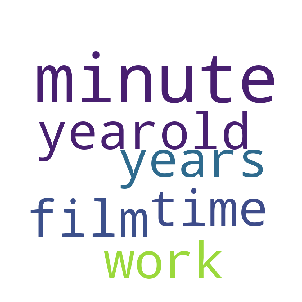

In [256]:
# plot the WordCloud image                        
p3=plt.figure(figsize = (4, 4), facecolor = None) 
p3=plt.imshow(wordcloud) 
p3=plt.axis("off") 
p3=plt.tight_layout(pad = 0) 
p3

In [73]:
wordcloud.to_file("wc.png")

In [74]:
wordcloud.to_file("wc.pdf")

In [265]:
output_file("NLP_Dashboard.html")
tools="pan,wheel_zoom,box_zoom,reset,save,box_select,hover"
#p1 = Paragraph(text="""""", width=400, height=100)

#-Predective Analytics Data Analysis
#p2 =Paragraph(text=""" Hyundai-Predective Analytics-EDA """, width=800, height=100, style={'font-size': '300%', 'color':'blue'},sizing_mode='fixed')
p2 = Paragraph(text="""Sentimental Analysis""", width=600, height=100, style={'font-size': '300%', 'color':'firebrick'})
p3 = figure(plot_width=400, plot_height=400, title="WORDCOUNT")
# plot the WordCloud image                        
#p3=plt.figure(figsize = (4, 4), facecolor = None) 
#p3=plt.imshow(wordcloud) 
#p3=plt.axis("off") 
#p3=plt.tight_layout(pad = 0) 
p3.image_url(url=['C:\\Users\\Milgram\\wc.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
p3.xaxis.visible = None
p3.yaxis.visible = None

#p4 = figure(tools="pan,wheel_zoom,box_zoom,reset")
x=df['Sentiment'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})
#p4 = figure(tools="pan,wheel_zoom,box_zoom,reset")
p4 = figure(plot_width=400, plot_height=400,x_axis_label="Count of Each Sentiments", y_axis_label="Count",title="Count of Each Sentiments", tools=tools,toolbar_location="right" ,tooltips=[("Sentiment","@x"),("Count","@top")])
p4.vbar(x=range(5), top=data['Count'], width=0.7,color=Spectral5,line_color="black")
#p4.y_range.start =0
#p4.y_range.end = 30
#p4.xaxis.major_label_orientation = pi/4
#show(p4)

x=df['Sentiment'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})
#data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['Count']/data['Count'].sum() * 2*pi
data['percent'] = data['Count'] /data['Count'].sum() * 100
data['color'] = Category20c[len(x)]
p5 = figure(plot_height=400,plot_width=400, title="Percentage of each Sentiments", toolbar_location=None,
           tools="hover", tooltips="@Sentiment: @percent{0.2f} %", x_range=(-0.5, 1.0))
p5.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Sentiment', source=data)
p5.axis.axis_label=None
p5.axis.visible=False
p5.grid.grid_line_color = None


slider = Slider(start=0, end=4, value=1, step=1, title="Sentiment Slider")
#show(column([p3,p4,p5],[p6,p8,None]))
col1 = row(p3,p4,p5)
col2 =row(slider)
col3 = row(p6,p3)
col4 =row(p2)

#col4 =row(p7)

show(column(col4,col1,col2))

-----------------------------------------------Practice----------------------------------------------------------

In [ ]:
feature_cols = ['transaction percentage','CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'C', 'M']
x = p[feature_cols]
y = p.isFraud
# Splitting data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

# Model development and prediction - Logistic Regression

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [ ]:
# fit model with data

logr.fit(x_train,y_train)

In [ ]:
# prediction

y_pred = logr.predict(x_test)

# Model Evaluation using Confusion Matrix - Logistic Regression

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

In [ ]:
print(cnf_matrix)

In [ ]:
from sklearn import metrics 
print("LogisticRegression model accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
x = train['clean_Phrase']
y = train['Sentiment']
# Splitting data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

# Model development and prediction - Logistic Regression

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [ ]:
train.dropna(inplace=True)
train.isna().sum()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(train['clean_Phrase'])
count_vector=cv.fit_transform(train['clean_Phrase'])
count_vector.all()

In [236]:
>>> from pandas import DataFrame
>>> from sklearn.feature_extraction.text import CountVectorizer
>>> docs = ["You can catch more flies with honey than you can with vinegar.",
...         "You can lead a horse to water, but you can't make him drink."]
>>> vect = CountVectorizer(min_df=0., max_df=1.0)
>>> X = vect.fit_transform(docs)
>>> print(DataFrame(X.A, columns=vect.get_feature_names()).to_string())

   but  can  catch  drink  flies  him  honey  horse  lead  make  more  than  to  vinegar  water  with  you
0    0    2      1      0      1    0      1      0     0     0     1     1   0        1      0     2    2
1    1    2      0      1      0    1      0      1     1     1     0     0   1        0      1     0    2


In [243]:
>>> from pandas import DataFrame
>>> from sklearn.feature_extraction.text import CountVectorizer
>>> docs =train['clean_Phrase'].toarray()
>>> vect = CountVectorizer(min_df=0., max_df=1.0)
>>> X = vect.fit_transform(docs)
>>> print(DataFrame(X.A, columns=vect.get_feature_names()).to_string())

AttributeError: 'Series' object has no attribute 'toarray'

In [246]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Get feature names
feature_names = count.get_feature_names()

# View feature names
feature_names

NameError: name 'count' is not defined

In [83]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Label,CleanPhrase,clean_Phrase
0,1,1,A series of escapades demonstrating the adage ...,1,Negative,[aseriesofescapadesdemonstratingtheadagethatwh...,aseriesofescapadesdemonstratingtheadagethatwha...
1,2,1,A series of escapades demonstrating the adage ...,2,Neutral,[aseriesofescapadesdemonstratingtheadagethatwh...,aseriesofescapadesdemonstratingtheadagethatwha...
2,3,1,A series,2,Neutral,[aseries],aseries
3,4,1,A,2,Neutral,[],
4,5,1,series,2,Neutral,[series],series


In [113]:
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})
#p4 = figure(tools="pan,wheel_zoom,box_zoom,reset")
p4 = figure(plot_width=400, plot_height=400,x_axis_label="Count of Each Sentiments", y_axis_label="Count",title="Count of Each Sentiments", tools=tools,toolbar_location="right" ,tooltips=[("Sentiment","@x"),("Count","@top")])
p4.vbar(x=range(5), top=data['Count'], width=0.7,color=Spectral5)
#p4.y_range.start =0
#p4.y_range.end = 30
#p4.xaxis.major_label_orientation = pi/4
show(p4)

In [110]:
data= pd.read_csv('C:\\Users\\Milgram\\Desktop\\POC\\train.tsv',delimiter='\t',encoding='utf-8')
x=data['Sentiment'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})
#df=data.head(8)
p4 = figure(x_range=data['Sentiment'],plot_width=600, plot_height=600,x_axis_label="Sentiments", 
            y_axis_label="Count",title="Count of each Sentiments",tools=tools,toolbar_location=None,tooltips=[("Sentiment","@x"),("Count","@top")])
p4.vbar(x=data['Sentiment'], top=data['Count'], width=0.9)
#p4.y_range.start = 0
#p4.y_range.end = 30
#p4.xaxis.major_label_orientation = pi/4
#p4.xaxis.major_label_overrides = {'wf_SCHED_CTRLM_AM_QM_CAARS_INCR': '1', 'wf_SCHED_CTRLM_MDMSTG_MDM_PREFERENCE_GENESIS': '2', 'wf_SCHED_WARR_DAILY_CDC': '3', 'wf_SCHED_EBIZ_DAILY':'4', 'wf_SCHED_WEEKLY_SERVICE_DCRS_WARR_LOAD_GEN':'5', 'wf_SCHED_CTRLM_WEEKLY_EMAIL_KMA_ACXIOM':'6', 'wf_SCHED_CTRLM_DAILY_KMA_CDM_CRM_RDR_KMF_DV_EDQIN_ODS_INCR':'7', 'wf_SCHED_CTRLM_DAILY_KMA_CDM_MDM_ENTERPRISE':'8'}
show(p4)

ValueError: Unrecognized range input: '[2 3 1 4 0]'

In [209]:
x=df['Sentiment'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})

In [210]:
data

,Sentiment,Count
0,2,79582
1,3,32927
2,1,27273
3,4,9206
4,0,7072


In [204]:
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Sentiment'})
#data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['Count']/data['Count'].sum() * 2*pi
data['color'] = Category20c[len(x)]
p5 = figure(plot_height=400, title="Percentage of each Sentiments", toolbar_location=None,
           tools="hover", tooltips="@Sentiment: @Count", x_range=(-0.5, 1.0))

p5.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', legend_field='Sentiment', source=data)

p5.axis.axis_label=None
p5.axis.visible=False
p5.grid.grid_line_color = None

#p8.xaxis.major_label_orientation = pi/4
show(p5)

KeyError: 156060

In [154]:
x=df['clean_Phrase']
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'clean_Phrase'})
source = ColumnDataSource(data)
columns = TableColumn(field="Sentiment", title="Sentiment",TableColumn(field="Count", title="Count")
data_table = (DataTable(source=source, columns=columns, width=600, height=400))
show(widgetbox(data_table))     

SyntaxError: invalid syntax (<ipython-input-154-7d23828fdc67>, line 5)

In [238]:
from datetime import date
from random import randint

from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.io import output_file, show

x=df['clean_Phrase'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'clean_Phrase'}) 
df1=data.head(8)

source = ColumnDataSource(df1)

#columns = TableColumn(field="Sentiment", title="Sentiment",
        #TableColumn(field="Count", title="Count")

p6 = DataTable(source=df1,columns=df1.columns, width=600, height=400)

show(p6)

ValueError: expected an instance of type DataSource, got   clean_Phrase  Count
0                 694
1      minutes     35
2       minute     20
3         film     14
4      yearold     13
5        years     12
6         work     12
7         time     12 of type DataFrame

In [224]:
x=df['clean_Phrase'].value_counts()
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'clean_Phrase'}) 
df1=data.head(8)
df1

,clean_Phrase,Count
0,,694
1,minutes,35
2,minute,20
3,film,14
4,yearold,13
5,years,12
6,work,12
7,time,12


In [227]:
columns = [
        TableColumn(field="clean_Phrase", title="Sentiment", formatter=DateFormatter()),
        TableColumn(field="Count", title="Count"),
    ]

In [229]:
p6 = DataTable(source=df1, columns=columns, width=600, height=400)

ValueError: expected an instance of type DataSource, got   clean_Phrase  Count
0                 694
1      minutes     35
2       minute     20
3         film     14
4      yearold     13
5        years     12
6         work     12
7         time     12 of type DataFrame

In [242]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import Panel, Tabs

output_file('stackoverflow.html')
p1 = figure()
p1.line(x=range(5), y=range(5))
tab1 = Panel(child=p1, title="Box Line Plot")
tabs = Tabs(tabs=[tab1])
show(tabs)

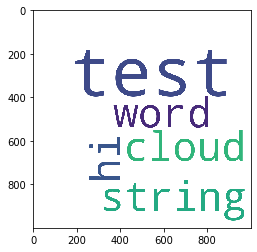

In [245]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

teststring = 'hi this is a test test test test test string for a word cloud'
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color='white', 
                      collocations=False).generate(teststring)
plt.imshow(wordcloud)